In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
import random
import time

https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html

In [2]:
G = nx.DiGraph()

In [3]:
weights = [('v1', 'v2', 1),('v1', 'v6', 3),
           ('v2', 'v7', 2),
           ('v3', 'v1', 1),('v3', 'v4', 4),('v3', 'v5', 1),
           ('v4', 'v2', 1),('v4', 'v5', 2),('v4', 'v7', 0),
           ('v5', 'v3', 0),
           ('v6', 'v5', 5),
           ('v7', 'v4', 1),('v7', 'v6', 1)]

In [4]:
G.add_weighted_edges_from(weights)

In [5]:
G.number_of_edges()

13

In [6]:
G.number_of_nodes()

7

In [7]:
fixed_pos = {'v1': (0, 0), 'v2': (0, 3), 'v3': (1, 1), 'v4': (2, 2), 'v5': (3, 1), 'v6': (4, 0), 'v7': (4, 3) }
fixed_nodes = fixed_pos.keys()
pos = nx.spring_layout(G, pos=fixed_pos, fixed=fixed_nodes)

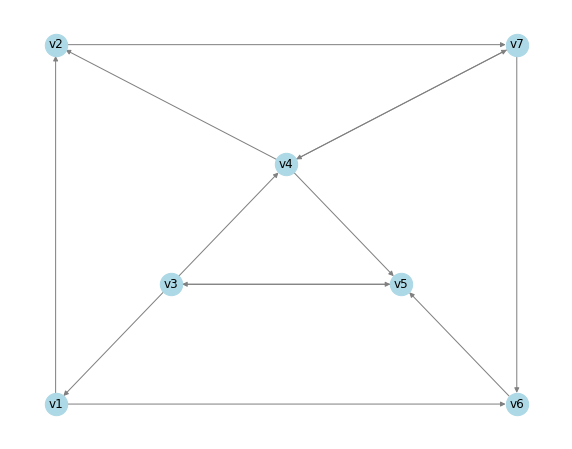

In [8]:
plt.figure(figsize=(10, 8)) 
nx.draw_networkx(G, pos=pos, edge_color="grey", node_color="lightblue", node_size=500, with_labels=True, font_size=12)
plt.axis("off")
plt.show()

In [9]:
dijkstra_path = nx.single_source_dijkstra_path(G, 'v1', weight="weight")
dijkstra_path

{'v1': ['v1'],
 'v2': ['v1', 'v2'],
 'v6': ['v1', 'v6'],
 'v7': ['v1', 'v2', 'v7'],
 'v5': ['v1', 'v2', 'v7', 'v4', 'v5'],
 'v4': ['v1', 'v2', 'v7', 'v4'],
 'v3': ['v1', 'v2', 'v7', 'v4', 'v5', 'v3']}

In [10]:
path = nx.shortest_path(G, source="v2", target="v5", weight="weight")
print(path)

['v2', 'v7', 'v4', 'v5']


In [11]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, 'v1', weight="weight")

In [12]:
sorted(pred.items())

[('v1', []),
 ('v2', ['v1']),
 ('v3', ['v5']),
 ('v4', ['v7']),
 ('v5', ['v4']),
 ('v6', ['v1']),
 ('v7', ['v2'])]

In [13]:
sorted(dist.items())

[('v1', 0), ('v2', 1), ('v3', 6), ('v4', 4), ('v5', 6), ('v6', 3), ('v7', 3)]

In [14]:
path = nx.dijkstra_path(G, 'v1', 'v4', weight="weight")
path

['v1', 'v2', 'v7', 'v4']

In [15]:
length = nx.dijkstra_path_length(G, 'v1', 'v4', weight="weight")
length

4

In [16]:
weights = [('v1', 'v2', 1),('v1', 'v6', 3),
           ('v2', 'v3', 3), ('v2', 'v5', -1),
           ('v3', 'v2', 0),
           ('v4', 'v3', 1),
           ('v5', 'v3', 1), ('v5', 'v4', 4), ('v5', 'v6', 3),
           ('v6', 'v1', 1), ('v6', 'v5', 0)]

In [17]:
G1 = nx.DiGraph()
G1.add_weighted_edges_from(weights)

In [18]:
fixed_pos = {'v1': (0, 1), 'v2': (1, 2), 'v3': (2, 2), 'v4': (3, 1), 'v5': (2, 0), 'v6': (1, 0) }
fixed_nodes = fixed_pos.keys()
pos = nx.spring_layout(G1, pos=fixed_pos, fixed=fixed_nodes)

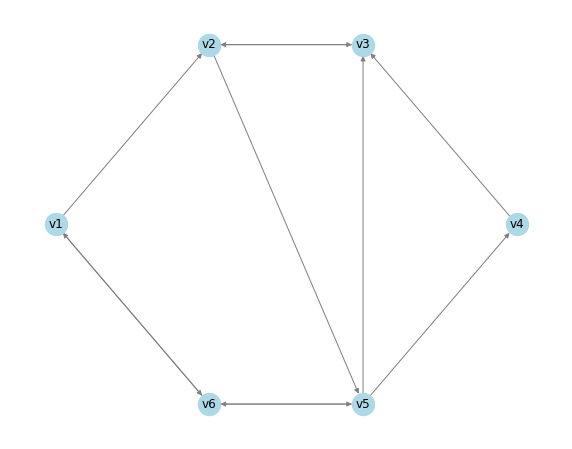

In [19]:
plt.figure(figsize=(10, 8)) 
nx.draw_networkx(G1, pos=pos, edge_color="grey", node_color="lightblue", node_size=500, with_labels=True, font_size=12)
plt.axis("off")
plt.show()

In [20]:
print(G1.number_of_edges())

11


In [21]:
path = nx.bellman_ford_path(G1, 'v1', 'v4', weight="weight")
print(path)

['v1', 'v2', 'v5', 'v4']


In [22]:
length = nx.bellman_ford_path_length(G1, 'v1', 'v4', weight="weight")
print(length)

4


In [23]:
length, path = nx.single_source_bellman_ford(G1, 'v1', weight="weight")
for node in G1:
    print(f"{node}: {length[node]}")

v1: 0
v2: 1
v6: 3
v3: 1
v5: 0
v4: 4


In [24]:
length, path = nx.single_source_bellman_ford(G1, 'v1', 'v2', weight="weight")
print(f"length = {length}")
print(f"path = {path}")

length = 1
path = ['v1', 'v2']


In [25]:
weights = [('v1', 'v2', 1),('v1', 'v3', 2),
           ('v2', 'v3', 3), ('v2', 'v4', -1),
           ('v3', 'v4', -2),
           ('v4', 'v2', 2)]

In [26]:
G2 = nx.DiGraph()
G2.add_weighted_edges_from(weights)

In [27]:
fixed_pos = {'v1':(0,1), 'v2':(1,2), 'v3':(1,0), 'v4':(2,1) }
fixed_nodes = fixed_pos.keys()
pos = nx.spring_layout(G2, pos=fixed_pos, fixed=fixed_nodes)

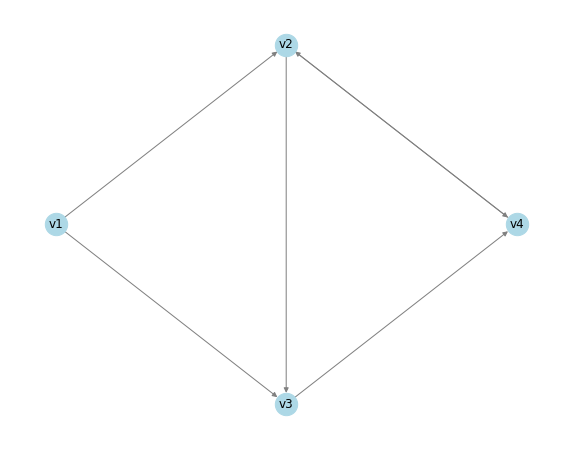

In [28]:
plt.figure(figsize=(10, 8)) 
nx.draw_networkx(G2, pos=pos, edge_color="grey", node_color="lightblue", node_size=500, with_labels=True, font_size=12)
plt.axis("off")
plt.show()

In [29]:
fw = nx.floyd_warshall(G2, weight="weight")
results = {a: dict(b) for a, b in fw.items()}

In [30]:
pprint(results)

{'v1': {'v1': 0, 'v2': 1, 'v3': 2, 'v4': 0},
 'v2': {'v1': inf, 'v2': 0, 'v3': 3, 'v4': -1},
 'v3': {'v1': inf, 'v2': 0, 'v3': 0, 'v4': -2},
 'v4': {'v1': inf, 'v2': 2, 'v3': 5, 'v4': 0}}


In [31]:
pred, dist = nx.floyd_warshall_predecessor_and_distance(G2, weight="weight")

In [32]:
pred

{'v1': {'v2': 'v1', 'v3': 'v1', 'v4': 'v2'},
 'v2': {'v3': 'v2', 'v4': 'v2'},
 'v3': {'v4': 'v3', 'v2': 'v4'},
 'v4': {'v2': 'v4', 'v3': 'v2'}}

In [33]:
dist

{'v1': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'v1': 0, 'v2': 1, 'v3': 2, 'v4': 0}),
 'v2': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'v2': 0, 'v3': 3, 'v4': -1, 'v1': inf}),
 'v3': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'v3': 0, 'v4': -2, 'v1': inf, 'v2': 0}),
 'v4': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'v4': 0, 'v2': 2, 'v1': inf, 'v3': 5})}

In [34]:
type(pred)

dict

In [35]:
fw = nx.reconstruct_path("v1", "v4", pred)

In [36]:
print(fw)

['v1', 'v2', 'v4']


In [37]:
# 1. Create a base directed graph (e.g., a random Erdos-Renyi graph)
n = 50  # Number of nodes
p = 0.3 # Probability of edge creation
G = nx.gnp_random_graph(n, p, directed=True) # Make it directed

In [38]:
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))

50
718


In [41]:
# 2. Assign random weights to all edges
# We use a dictionary comprehension to efficiently assign weights
# In this example, weights are random integers between 1 and 10
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(0, 5)

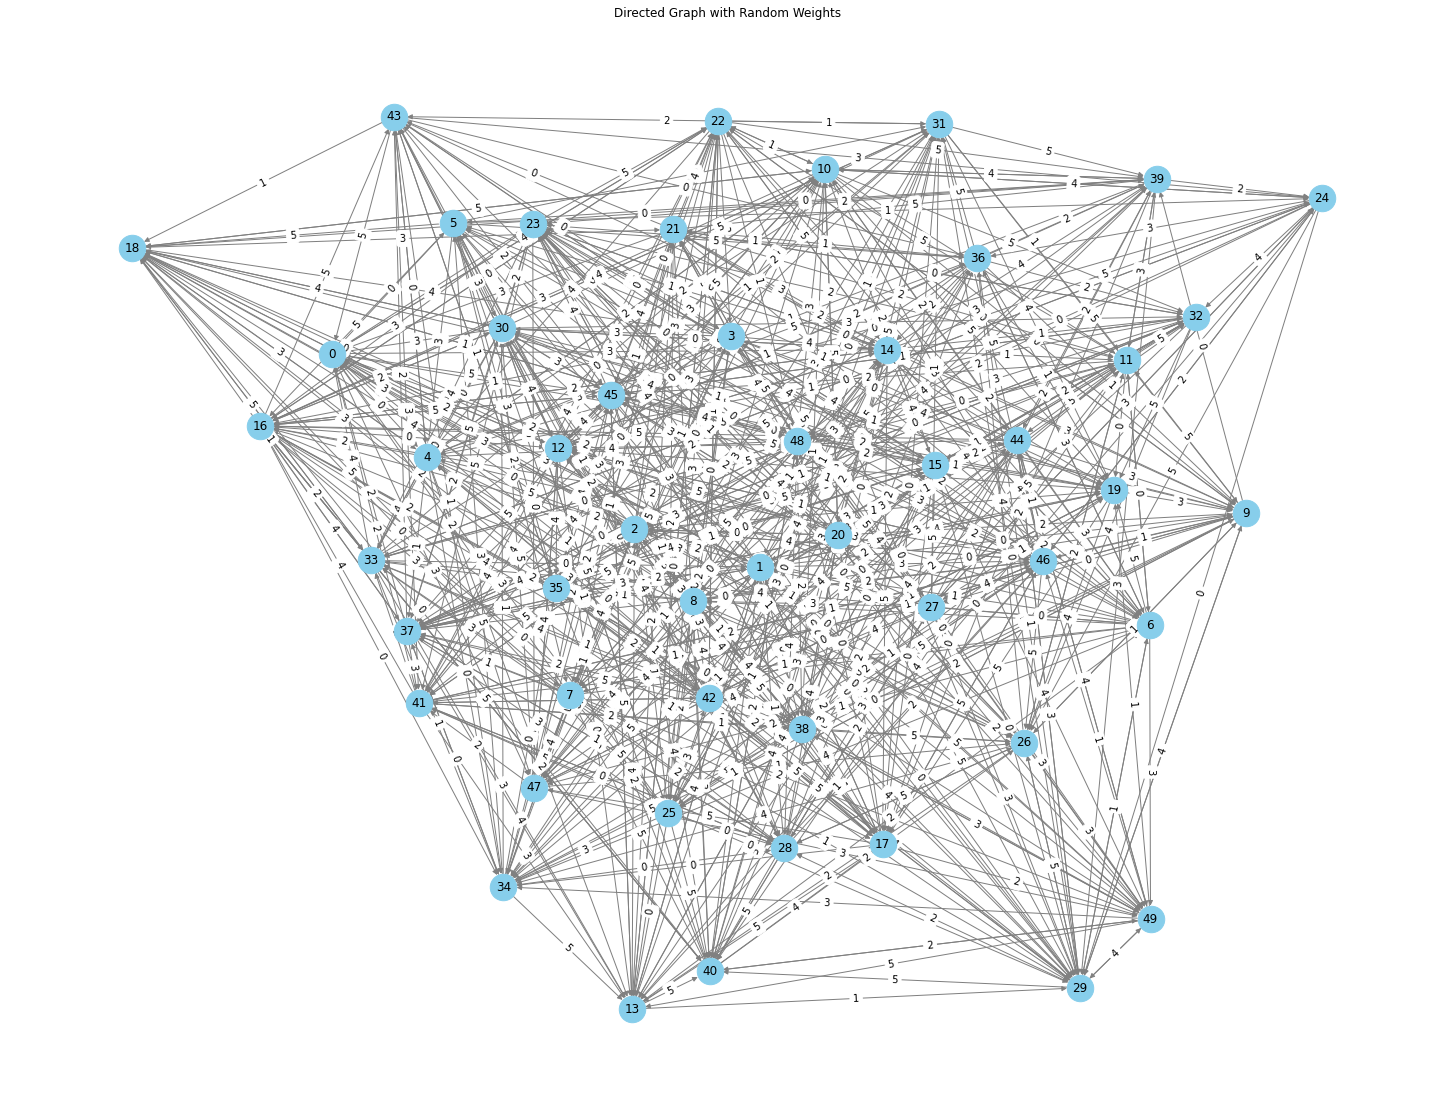

In [42]:
# 3. Visualization
plt.figure(figsize=(20, 15)) 
pos = nx.spring_layout(G) # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Directed Graph with Random Weights")
plt.show()


In [43]:
print(nx.negative_edge_cycle(G))

False


In [49]:
if nx.negative_edge_cycle(G) == True:
    for i in G.nodes():
        print(nx.find_negative_cycle(G,i))

In [50]:
for u, v, data in G.edges(data=True):
    print(f"aresta ({u}, {v}): distancia = {data['weight']}")

aresta (0, 1): distancia = 3
aresta (0, 4): distancia = 0
aresta (0, 5): distancia = 0
aresta (0, 12): distancia = 5
aresta (0, 14): distancia = 3
aresta (0, 20): distancia = 2
aresta (0, 22): distancia = 2
aresta (0, 23): distancia = 5
aresta (0, 26): distancia = 3
aresta (0, 38): distancia = 1
aresta (0, 45): distancia = 5
aresta (0, 47): distancia = 3
aresta (1, 2): distancia = 2
aresta (1, 5): distancia = 2
aresta (1, 6): distancia = 1
aresta (1, 9): distancia = 0
aresta (1, 13): distancia = 2
aresta (1, 14): distancia = 1
aresta (1, 15): distancia = 3
aresta (1, 17): distancia = 0
aresta (1, 18): distancia = 5
aresta (1, 19): distancia = 3
aresta (1, 23): distancia = 4
aresta (1, 25): distancia = 3
aresta (1, 32): distancia = 4
aresta (1, 34): distancia = 5
aresta (1, 36): distancia = 5
aresta (1, 37): distancia = 4
aresta (1, 38): distancia = 0
aresta (1, 40): distancia = 0
aresta (1, 46): distancia = 3
aresta (1, 47): distancia = 0
aresta (1, 49): distancia = 5
aresta (2, 0): di

In [51]:
start_time = time.time()
dijkstra_path = nx.single_source_dijkstra_path(G, 1)
print("--- %s seconds ---" % round((time.time() - start_time),4))
print(dijkstra_path)

--- 0.0004 seconds ---
{1: [1], 2: [1, 9, 34, 2], 5: [1, 9, 39, 5], 6: [1, 9, 27, 6], 9: [1, 9], 13: [1, 17, 0, 4, 24, 13], 14: [1, 47, 14], 15: [1, 9, 34, 35, 15], 17: [1, 17], 18: [1, 9, 39, 18], 19: [1, 47, 19], 23: [1, 9, 27, 23], 25: [1, 9, 34, 2, 25], 32: [1, 17, 48, 21, 32], 34: [1, 9, 34], 36: [1, 17, 48, 21, 43, 36], 37: [1, 17, 31, 37], 38: [1, 38], 40: [1, 40], 46: [1, 17, 31, 37, 46], 47: [1, 47], 49: [1, 17, 0, 4, 49], 7: [1, 17, 48, 33, 10, 7], 11: [1, 17, 31, 37, 11], 20: [1, 38, 20], 22: [1, 9, 34, 22], 26: [1, 9, 39, 18, 26], 27: [1, 9, 27], 29: [1, 9, 34, 35, 15, 29], 30: [1, 9, 39, 18, 30], 39: [1, 9, 39], 0: [1, 17, 0], 12: [1, 17, 0, 4, 49, 12], 31: [1, 17, 31], 42: [1, 47, 19, 42], 48: [1, 17, 48], 8: [1, 38, 20, 8], 10: [1, 17, 48, 33, 10], 16: [1, 17, 0, 4, 49, 16], 33: [1, 17, 48, 33], 35: [1, 9, 34, 35], 44: [1, 17, 0, 4, 24, 13, 44], 3: [1, 17, 48, 33, 3], 41: [1, 9, 34, 28, 41], 45: [1, 9, 34, 35, 15, 45], 21: [1, 17, 48, 21], 24: [1, 17, 0, 4, 24], 28: [1, 

In [52]:
start_time = time.time()
bellman_path = nx.single_source_bellman_ford_path(G, 1)
print("--- %s seconds ---" % round((time.time() - start_time),4))
print(bellman_path)

--- 0.0011 seconds ---
{1: [1], 2: [1, 9, 34, 2], 5: [1, 17, 0, 5], 6: [1, 9, 27, 6], 9: [1, 9], 13: [1, 17, 0, 4, 24, 13], 14: [1, 47, 14], 15: [1, 9, 34, 35, 15], 17: [1, 17], 18: [1, 17, 0, 4, 18], 19: [1, 47, 19], 23: [1, 9, 27, 23], 25: [1, 9, 34, 2, 25], 32: [1, 17, 48, 21, 32], 34: [1, 9, 34], 36: [1, 17, 48, 21, 43, 36], 37: [1, 17, 31, 37], 38: [1, 38], 40: [1, 40], 46: [1, 17, 31, 37, 46], 47: [1, 47], 49: [1, 17, 0, 4, 49], 0: [1, 17, 0], 7: [1, 17, 0, 4, 33, 10, 7], 20: [1, 38, 20], 21: [1, 17, 48, 21], 22: [1, 9, 34, 22], 28: [1, 9, 34, 28], 41: [1, 9, 34, 28, 41], 44: [1, 17, 0, 4, 24, 13, 44], 4: [1, 17, 0, 4], 12: [1, 17, 0, 4, 24, 29, 12], 16: [1, 17, 0, 4, 49, 16], 24: [1, 17, 0, 4, 24], 29: [1, 17, 0, 4, 24, 29], 31: [1, 17, 31], 3: [1, 38, 20, 8, 3], 8: [1, 38, 20, 8], 10: [1, 17, 0, 4, 33, 10], 11: [1, 17, 31, 37, 11], 26: [1, 17, 0, 4, 18, 26], 27: [1, 9, 27], 30: [1, 17, 0, 4, 18, 30], 39: [1, 9, 39], 45: [1, 17, 0, 4, 24, 29, 12, 45], 42: [1, 47, 19, 42], 48: [1